## Thresholding, Binarization & Adaptive Thresholding


In thresholding, we convert a grey scale image to it's binary form

Original


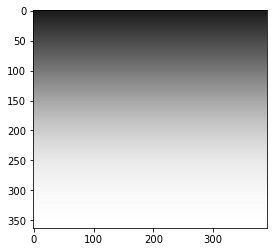

1 Threshold Binary


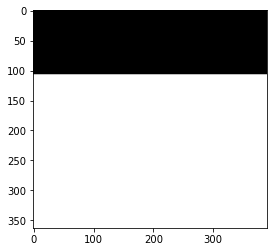

2 Threshold Binary Inverse


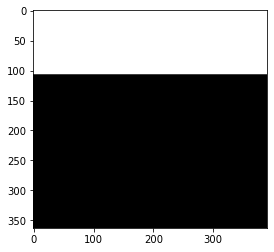

3 THRESH TRUNC


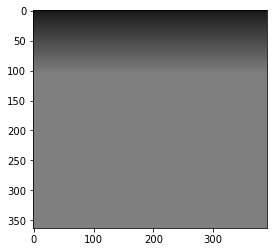

4 THRESH TOZERO


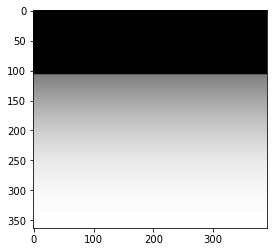

5 THRESH TOZERO INV


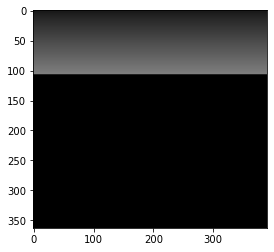

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show(name,image):
    plt.figure()
    print(name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Load our image as greyscale 
image = cv2.imread('images/gradient.jpg',0)
cv2.imshow('Original', image)
show('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)
show('1 Threshold Binary', thresh1)
# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)
show('2 Threshold Binary Inverse', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)
show('3 THRESH TRUNC', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)
show('4 THRESH TOZERO', thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
show('5 THRESH TOZERO INV', thresh5)  
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

### Is there a better way off thresholding?

The biggest downfall of those simple threshold methods is that we need to provide the threshold value (i.e. the 127 value we used previously).
#### What if there was a smarter way of doing this?

There is with, Adaptive thresholding. 



Original


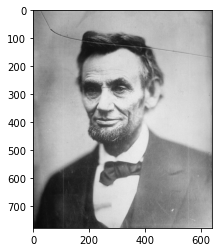

Threshold Binary


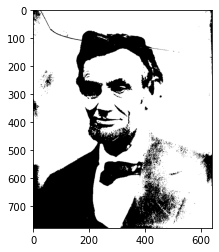

Adaptive Mean Thresholding


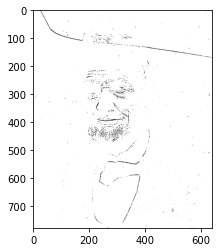

Otsu's Thresholding


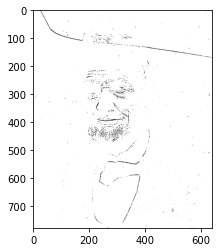

Guassian Otsu's Thresholding


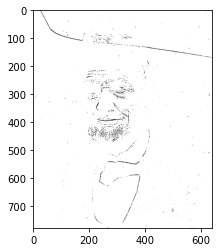

In [2]:
import cv2
import numpy as np

# Load our new image
image = cv2.imread('images/abraham.jpg', 0)

cv2.imshow('Original', image)
show('Original', image)
cv2.waitKey(0) 

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
show('Threshold Binary', thresh1)
cv2.waitKey(0) 

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
# (image, Max Value, Adaptive type, Block size, Constant that is sub from mean : preferrably 5)
cv2.imshow("Adaptive Mean Thresholding", thresh) 
show("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", thresh) 
show("Otsu's Thresholding", thresh) 
cv2.waitKey(0) 
#otsu is one of the best
#Algorithm that assumes 2 peaks in the grayscale histogram of an image 
# finds an optimal value to separate these peaks to find threshold

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", thresh) 
show("Guassian Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

cv2.destroyAllWindows()